# Import Libraries

In [2]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [7]:

try:
    import common 
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

DATA

WindowsPath('C:/Users/INDHRNA/Desktop/ML/practical_statistics_Python_BRUCE/Indhra-version/data')

# Data file path's

In [6]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'
STATE_CSV

WindowsPath('C:/Users/INDHRNA/Desktop/ML/practical_statistics_Python_BRUCE/Indhra-version/data/state.csv')

In [11]:
# import common
# DATA = common.dataDirectory()
# DATA

In [13]:
state = pd.read_csv(STATE_CSV)
state.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [14]:
state['Population'].mean()

6162876.3

In [15]:
trim_mean(state['Population'],proportiontocut=0.10)

4783697.125

In [16]:
state.Population.median()

4436369.5

In [18]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [19]:
state['Population'].std()

6848235.347401142

In [20]:
(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0

In [21]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [24]:
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501

3849876.146546352

In [25]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [26]:
percentages = [0.05,0.25,0.5,0.75,0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))

df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


In [35]:
popu = state['Population']
murder = state['Murder.Rate']

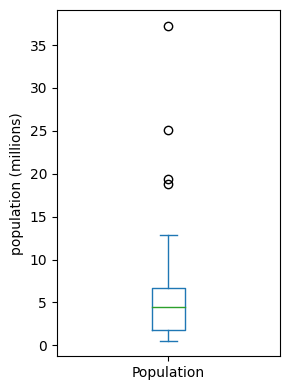

In [36]:
ax = (popu / 1000000).plot.box(figsize=(3,4))
ax.set_ylabel('population (millions)')
plt.tight_layout()
plt.show()

In [37]:
binned_population = pd.cut(popu, 10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [38]:
binned_population.name = 'binned_population'
df = pd.concat([state,binned_population], axis=1)
df = df.sort_values(by='Population')
df.head()

,State,Population,Murder.Rate,Abbreviation,binned_population
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"


In [39]:
groups = []
for group, subset in df.groupby(by='binned_population'):
    groups.append({
        'Bin_range': group,
        'Count': len(subset),
        'Stats': ','.join(subset.Abbreviation)
        
    })
    
pd.DataFrame(groups)

,Bin_range,Count,Stats
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


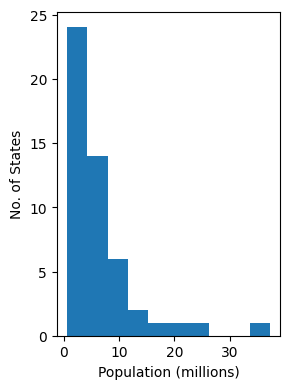

In [40]:
ax = (popu / 1000000).plot.hist(figsize=(3,4))
ax.set_xlabel('Population (millions)')
ax.set_ylabel('No. of States')
plt.tight_layout()
plt.show()


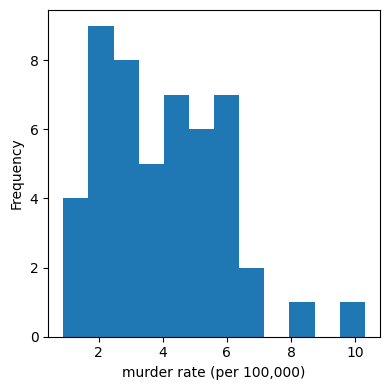

In [45]:
ax = murder.plot.hist(bins=12, figsize=(4, 4))
 
ax.set_xlabel('murder rate (per 100,000)')

plt.tight_layout()
plt.show()


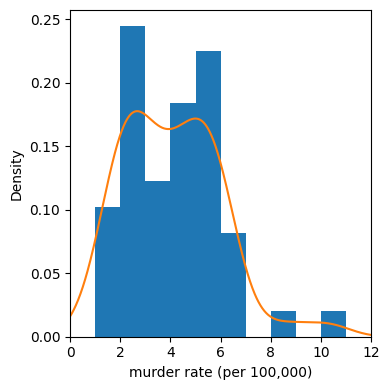

In [43]:
ax = murder.plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))

murder.plot.density(ax=ax)
ax.set_xlabel('murder rate (per 100,000)')

plt.tight_layout()
plt.show()


In [56]:
## exploring binary variables

In [47]:
airport_delays = pd.read_csv(AIRPORT_DELAYS_CSV)
airport_delays.head(3)

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [52]:
100 * airport_delays / airport_delays.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


In [53]:
100 * airport_delays / airport_delays.sum().sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


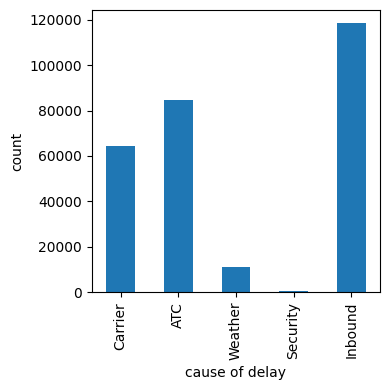

In [54]:
ax = airport_delays.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('cause of delay')

ax.set_ylabel('count')

plt.tight_layout()
plt.show()

In [55]:
## correlation

In [61]:
sp500_sec = pd.read_csv(SP500_SECTORS_CSV)

sp500_px = pd.read_csv(SP500_DATA_CSV,index_col=0)

sp500_sec.head(3)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT


In [62]:
sp500_px.head(4)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0


In [64]:
# Table 1-7
# Determine telecommunications symbols
# 
telecom_symbols = sp500_sec[sp500_sec['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecom_symbols]
telecom.corr()


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [66]:
sp500_sec[sp500_sec['sector'] == 'etf']['symbol']

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [65]:
## focus on funds traded on major exchanges (setor =='etf')

etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sec[sp500_sec['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


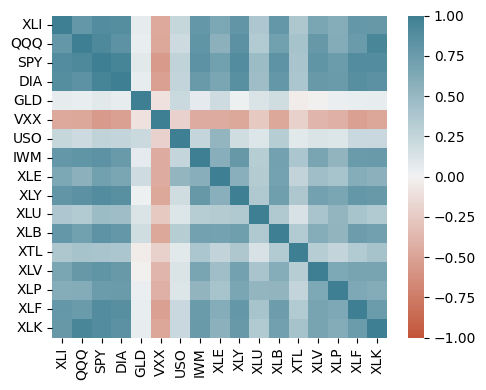

In [68]:
fig, ax = plt.subplots(figsize=(5,4))

ax = sns.heatmap(etfs.corr(),vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20,220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

In [69]:
## skipping the heat map with sizes

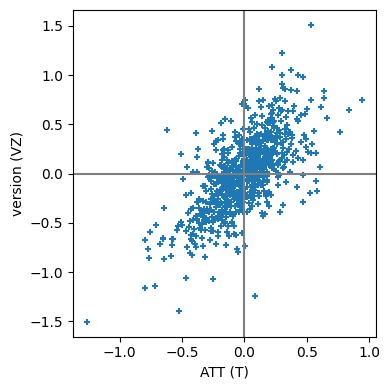

In [71]:
ax = telecom.plot.scatter(x='T',y='VZ', figsize=(4,4), marker='+')
ax.set_ylabel('version (VZ)')
ax.set_xlabel('ATT (T)')

ax.axhline(0, color='grey')
ax.axvline(0, color='grey')
plt.tight_layout()
plt.show()

Line2D(_child2)


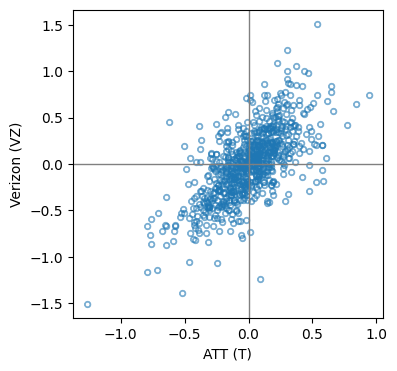

In [72]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

In [74]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [77]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                 (kc_tax.SqFtTotLiving > 100) &
                 (kc_tax.SqFtTotLiving < 3500), :]

kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


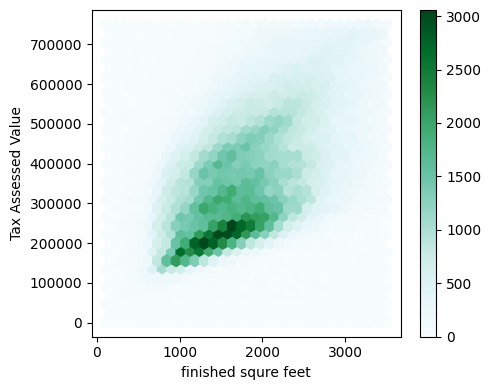

In [80]:
## hexagonal binning and contours

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5,4))

ax.set_xlabel('finished squre feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

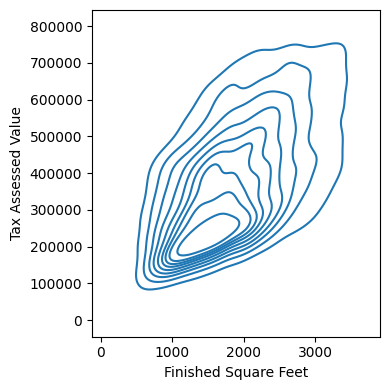

In [81]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving',y='TaxAssessedValue',
            ax=ax)

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [82]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [86]:
cross_tab = lc_loans.pivot_table(index='grade', columns='status',
                                 aggfunc=lambda x: len(x), margins=True)
cross_tab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [87]:
df = cross_tab.copy().loc['A':'G',:]
df.head()

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804


In [88]:
df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] /sum(df['All'])
df.head()


status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177


In [89]:
## categorical and numeric data

airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


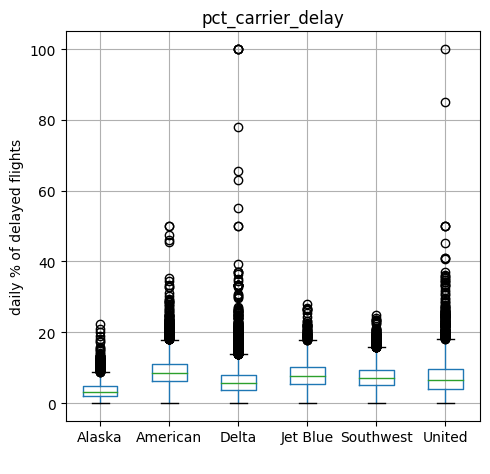

In [91]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5,5))
ax.set_xlabel(' ')
ax.set_ylabel('daily % of delayed flights')
plt.suptitle('')


plt.tight_layout()
plt.show()

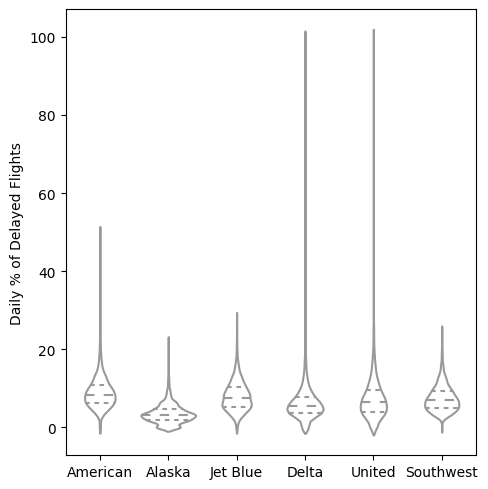

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

In [94]:
## visualizing multiple variables

zip_codes = [98188, 98105, 98108, 98126]

kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip.head()


,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


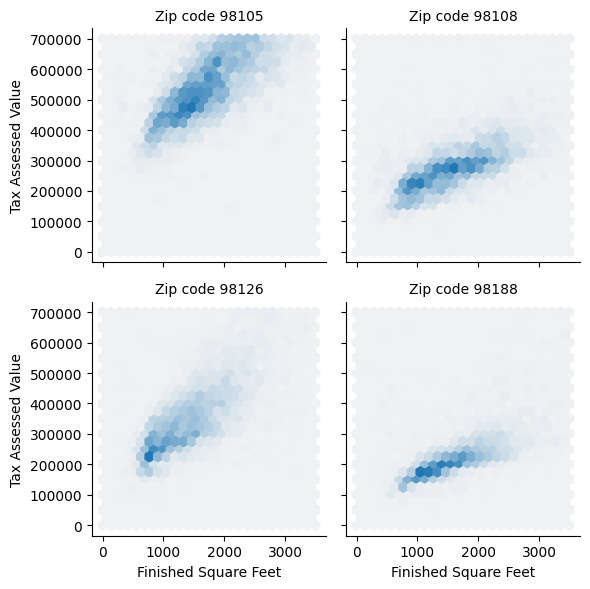

In [95]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)
    
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0,3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()